In [ ]:
!pip install fbprophet
from fbprophet import Prophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
import datetime as dt
rcParams['figure.figsize'] = 18, 8

# Pré processamento

In [2]:
dado = pd.read_csv('./TFP.csv') 

usa = dado[dado.isocode=="USA"]
usa.index = usa.year 
usa =usa.drop(['isocode','year'],axis=1)

can = dado[dado.isocode=="CAN"] 
can.index = can.year 
can = can.drop(['isocode','year'],axis=1) 

mex = dado[dado.isocode=="MEX"] 
mex.index = mex.year
mex = mex.drop(['isocode','year'],axis=1) 

dataset = pd.DataFrame({"MEX":mex.values[:,0],"CAN":can.values[:,0],"USA":usa.values[:,0]},index=mex.index) 

In [3]:
dataset

,MEX,CAN,USA
year,,,
1950,0.798159,0.843335,0.617148
1951,0.860931,0.855123,0.629588
1952,0.876968,0.896489,0.638451
1953,0.855204,0.910658,0.651858
1954,0.929168,0.875178,0.646179
...,...,...,...
2007,1.013673,0.981433,1.006595
2008,0.991548,0.958357,0.998499
2009,0.915879,0.926482,0.986738


# Algumas características do dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1950 to 2011
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEX     62 non-null     float64
 1   CAN     62 non-null     float64
 2   USA     62 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MEX,62.0,1.130132,0.158209,0.798159,1.012231,1.093859,1.299591,1.383718
CAN,62.0,0.992886,0.050126,0.843335,0.973294,1.004211,1.029513,1.066104
USA,62.0,0.803824,0.116121,0.617148,0.739949,0.766047,0.880544,1.020392


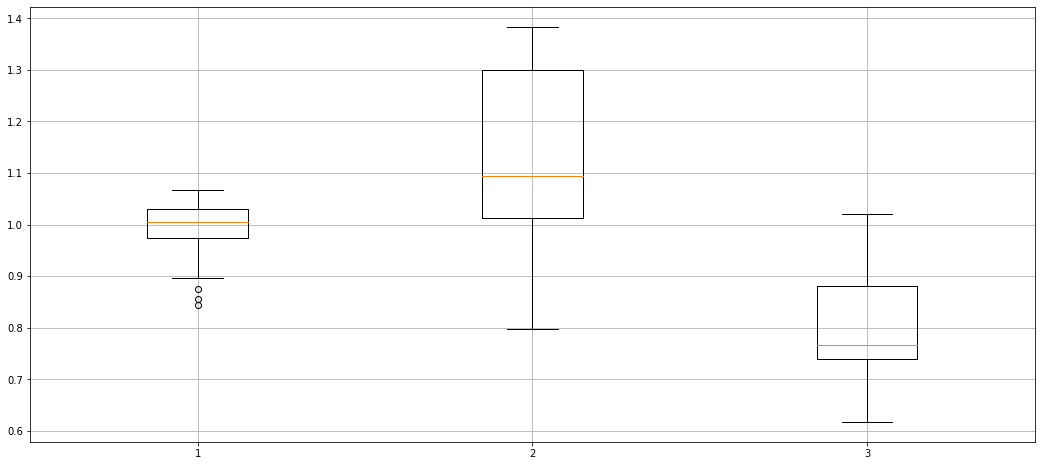

In [6]:
plt.boxplot([dataset.CAN, dataset.MEX, dataset.USA])
plt.grid()

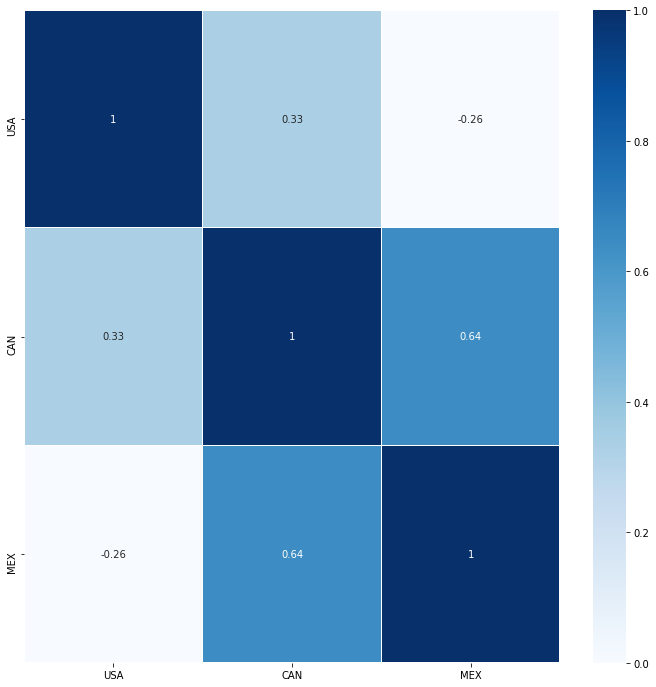

In [7]:
corr = pd.DataFrame({"USA":dataset.USA,"CAN":dataset.CAN,"MEX":dataset.MEX}).corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", linewidths=0.1, annot=True)

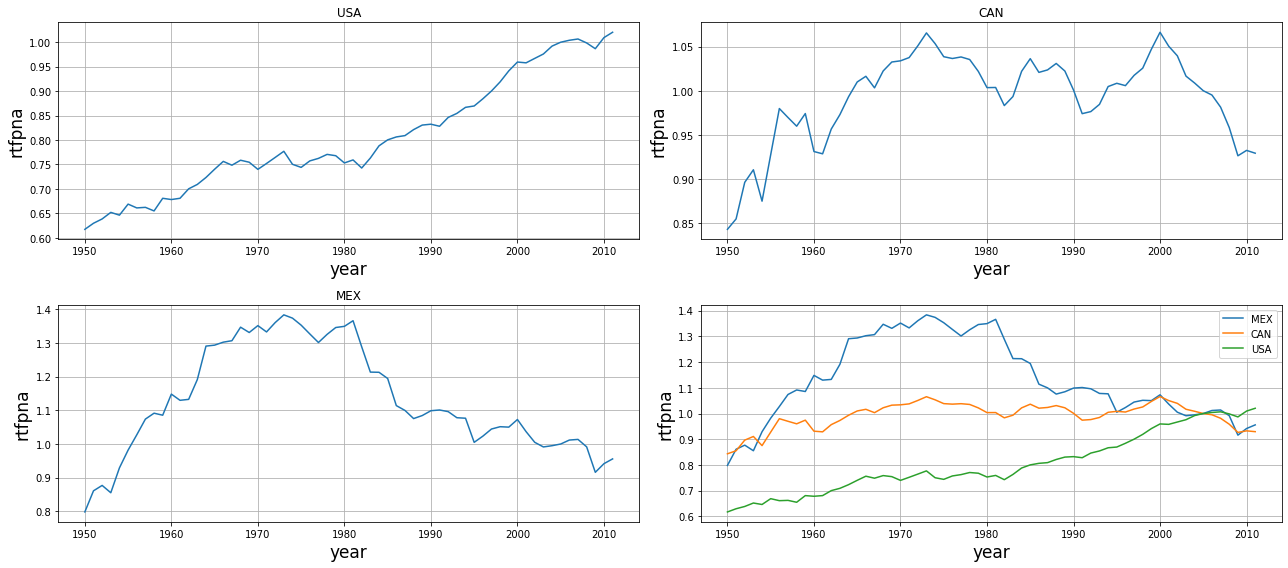

In [8]:
ax1 = plt.subplot(2,2,1)
ax1.plot(dataset.index,dataset.USA)
ax1.set_title('USA')
ax1.grid()
ax1.set_ylabel('rtfpna', fontsize=17)
ax1.set_xlabel('year', fontsize=17)

ax2 = plt.subplot(2,2,2)
ax2.plot(dataset.index,dataset.CAN)
ax2.set_title('CAN')
ax2.grid()
ax2.set_ylabel('rtfpna', fontsize=17)
ax2.set_xlabel('year', fontsize=17)

ax3 = plt.subplot(2,2,3)
ax3.plot(dataset.index,dataset.MEX)
ax3.set_title('MEX')
ax3.grid()
ax3.set_ylabel('rtfpna', fontsize=17)
ax3.set_xlabel('year', fontsize=17)

ax4 = plt.subplot(2,2,4)
ax4.plot(dataset.index,dataset.MEX, label='MEX')
ax4.plot(dataset.index,dataset.CAN, label='CAN')
ax4.plot(dataset.index,dataset.USA, label='USA')
ax4.legend()
ax4.grid()
ax4.set_ylabel('rtfpna', fontsize=17)
ax4.set_xlabel('year', fontsize=17)

plt.tight_layout()

Text(0.5, 0, 'year')

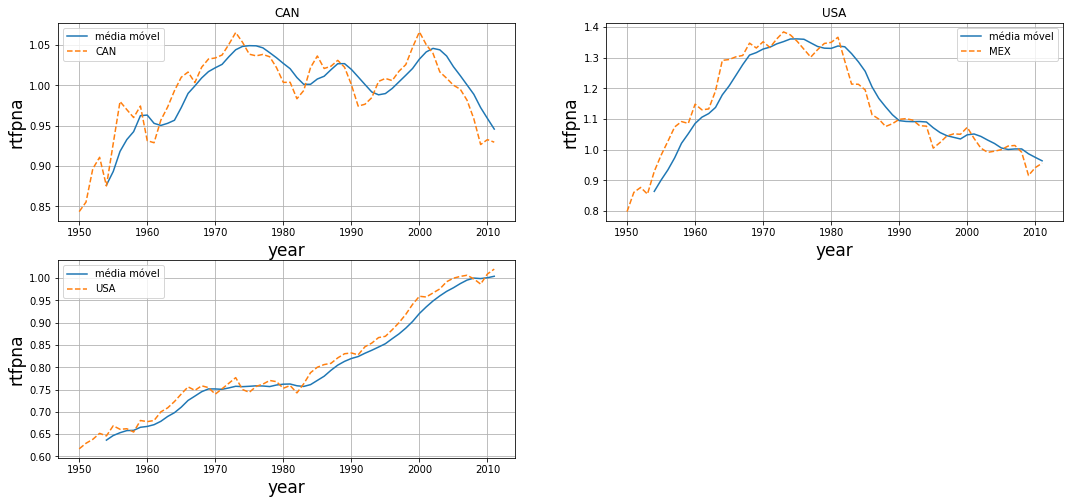

In [9]:
ax1 = plt.subplot(2,2,1)
ax1.plot(dataset.index,dataset.CAN.rolling(5).mean(), label='média móvel')
ax1.plot(dataset.index,dataset.CAN, '--', label='CAN')
ax1.legend()
ax1.set_title('CAN')
ax1.grid()
ax1.set_ylabel('rtfpna', fontsize=17)
ax1.set_xlabel('year', fontsize=17)


ax2 = plt.subplot(2,2,2)
ax2.plot(dataset.index,dataset.MEX.rolling(5).mean(), label='média móvel')
ax2.plot(dataset.index,dataset.MEX, '--', label='MEX')
ax2.legend()
ax2.set_title('MEX')
ax2.grid()
ax2.set_ylabel('rtfpna', fontsize=17)
ax2.set_xlabel('year', fontsize=17)


ax3 = plt.subplot(2,2,3)
ax3.plot(dataset.index,dataset.USA.rolling(5).mean(), label='média móvel')
ax3.plot(dataset.index,dataset.USA, '--', label='USA')
ax3.legend()
ax2.set_title('USA')
ax3.grid()
ax3.set_ylabel('rtfpna', fontsize=17)
ax3.set_xlabel('year', fontsize=17)



# USA

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


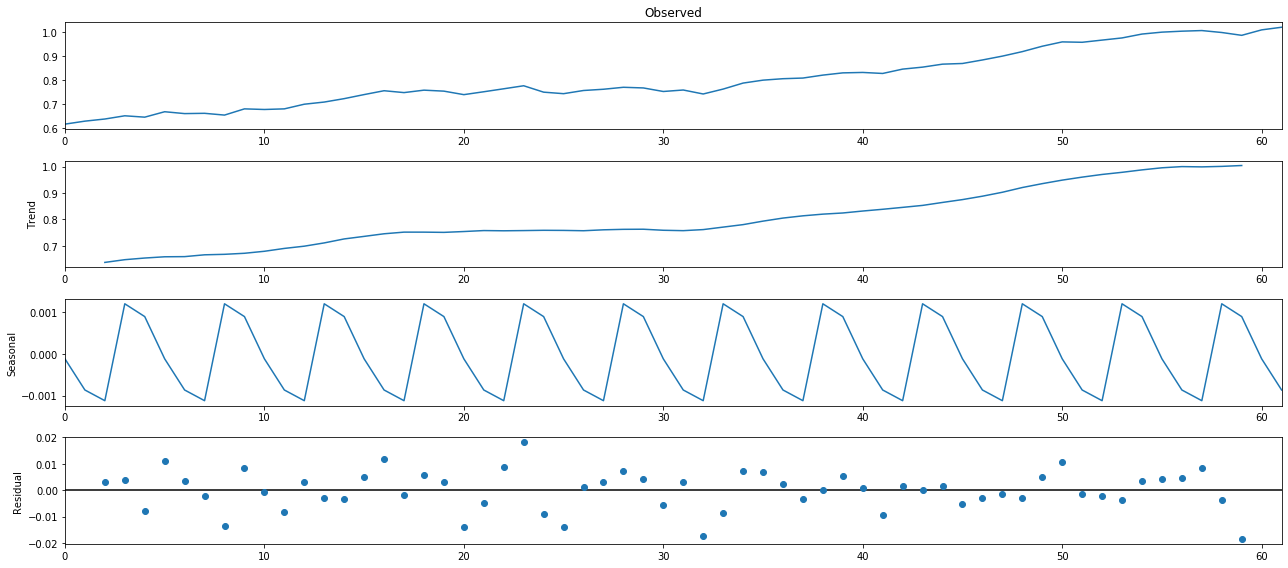

In [10]:
decomposition = sm.tsa.seasonal_decompose(dataset.USA.values, model='additive', freq=5)
fig = decomposition.plot()
plt.show()

# MEX

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


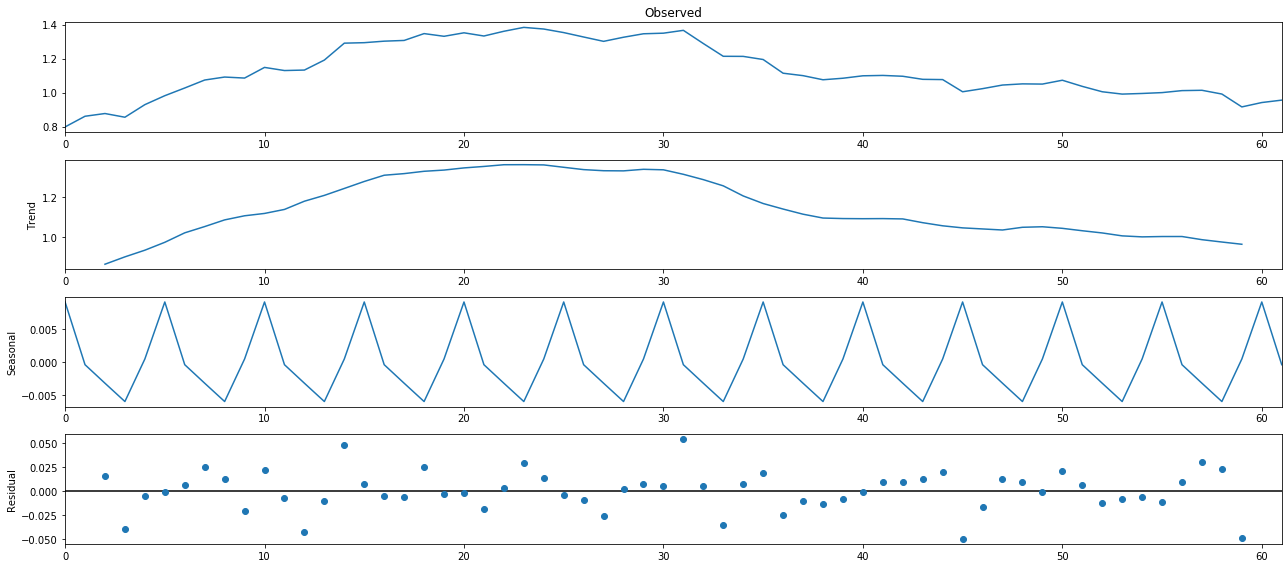

In [11]:
decomposition = sm.tsa.seasonal_decompose(dataset.MEX.values, model='additive', freq=5)
fig = decomposition.plot()
plt.show()

# CAN

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


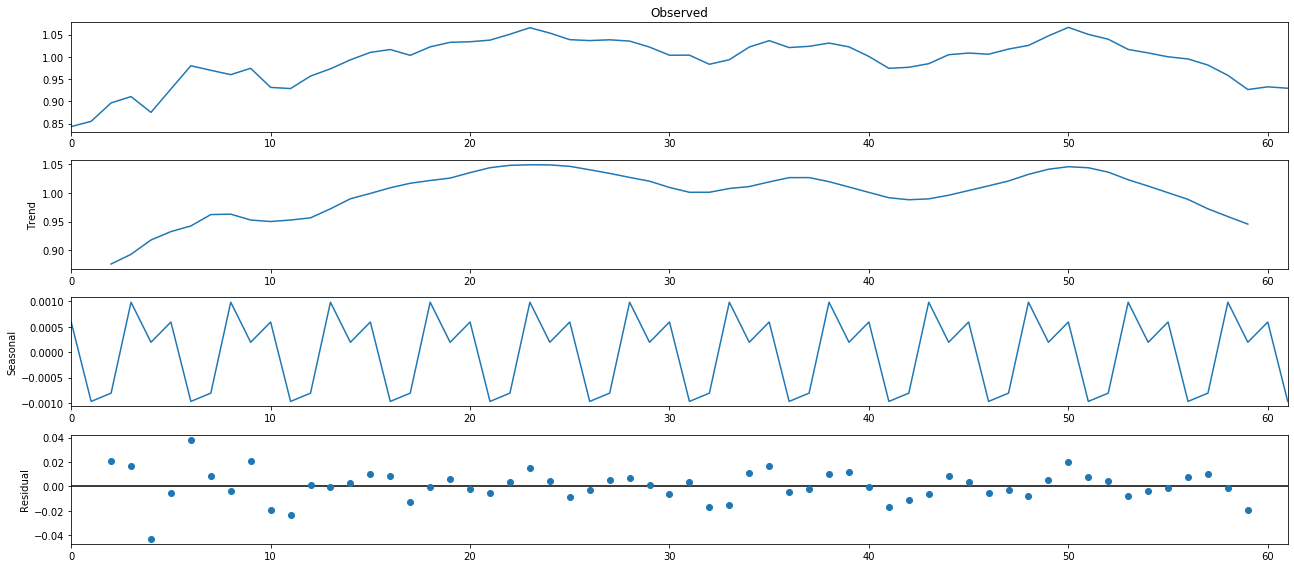

In [12]:
decomposition = sm.tsa.seasonal_decompose(dataset.CAN.values, model='additive', freq=5)
fig = decomposition.plot()
plt.show()

# PREVISÃO

In [13]:
ds=[]
for i in list(range(can.index[0],can.index[-1]+10)):
    ds.append(dt.datetime(i,1,1))

In [14]:
y = pd.DataFrame({'ds':np.array(ds)[:-19], 'y':can.iloc[:-10,0].values}, index=pd.to_datetime(np.array(ds)[:-19]))
y_test = pd.DataFrame({'ds':ds[:-9],'y':can.values[:,0]}, index=pd.to_datetime(ds[:-9]).year)

In [15]:
y = pd.DataFrame({'ds':np.array(ds)[:-19], 'y':usa.iloc[:-10,0].values}, index=pd.to_datetime(np.array(ds)[:-19]))
y_test = pd.DataFrame({'ds':ds[:-9],'y':usa.values[:,0]}, index=pd.to_datetime(ds[:-9]).year)

from fbprophet import Prophet

m = Prophet(weekly_seasonality=True,daily_seasonality=True)
m.fit(y)

future=pd.DataFrame({'ds':ds[-9:]})
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forecast.index=pd.to_datetime(forecast.ds.values).year

Importing plotly failed. Interactive plots will not work.


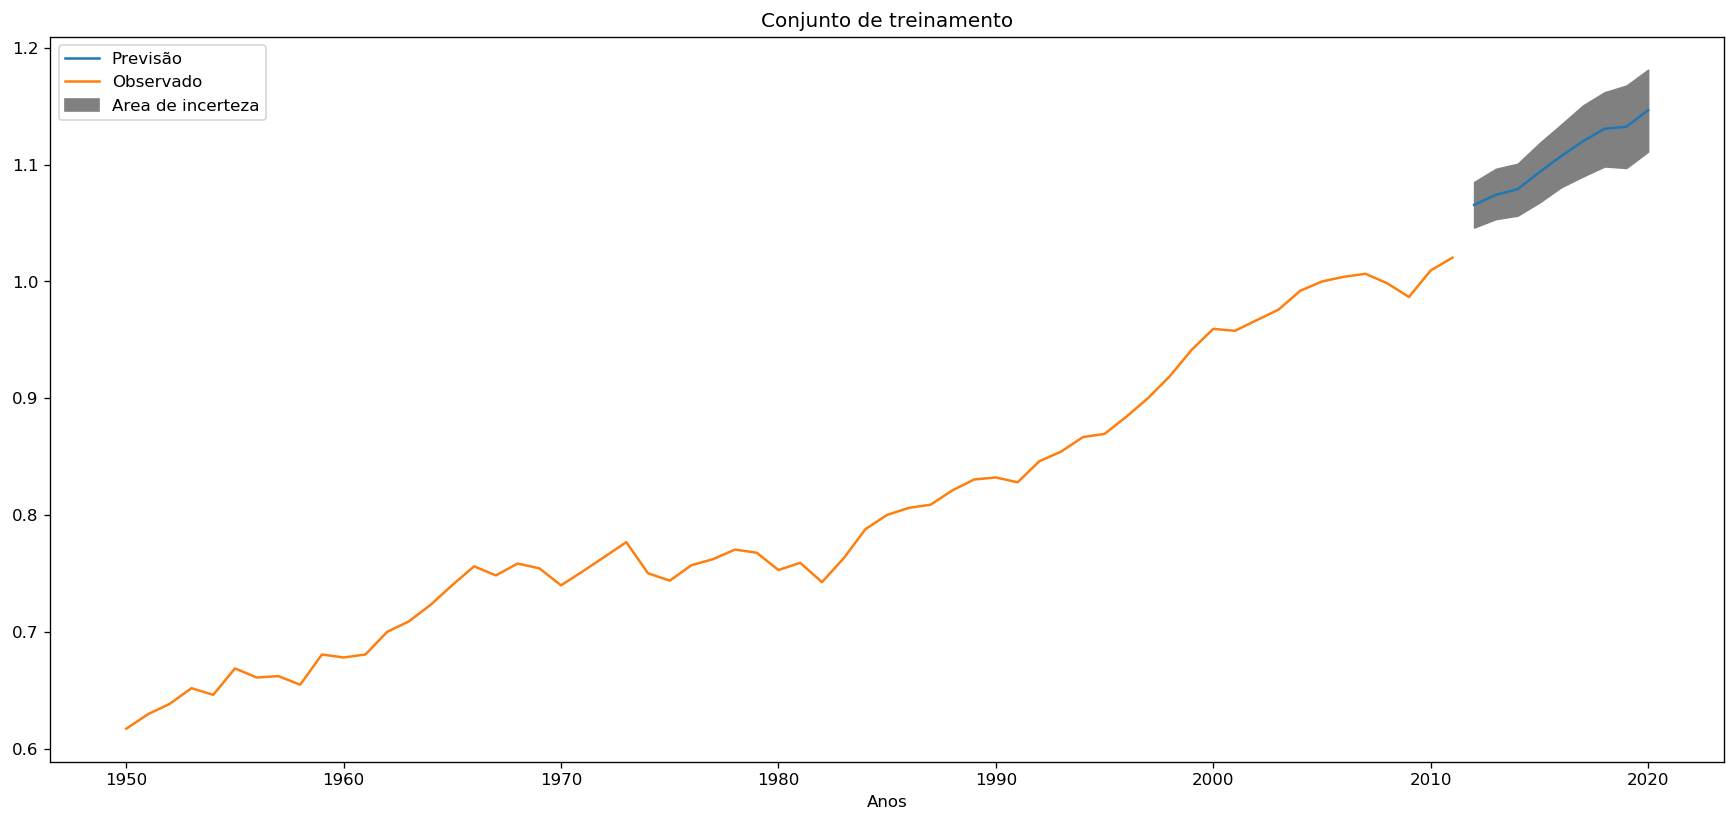

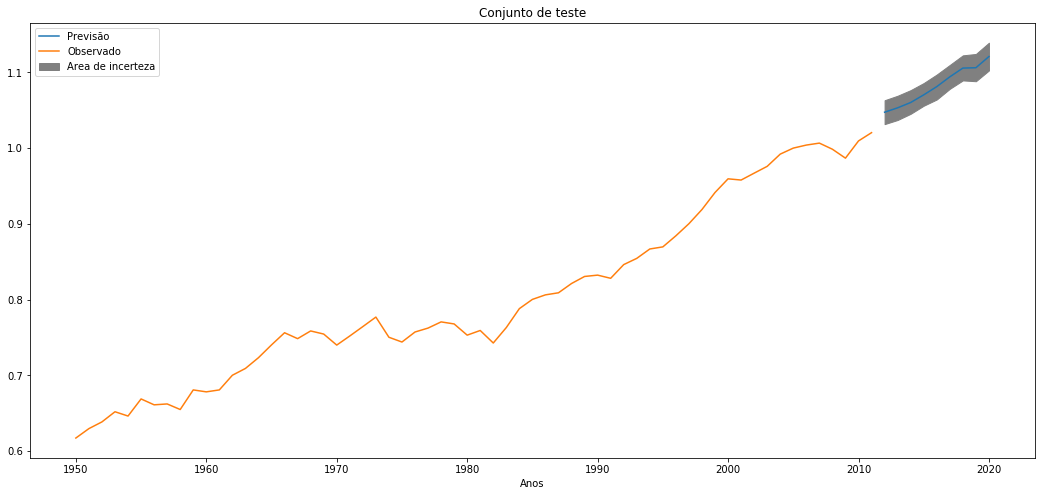

In [26]:
y = pd.DataFrame({'ds':np.array(ds)[:-19], 'y':usa.iloc[:-10,0].values}, index=pd.to_datetime(np.array(ds)[:-19]))
y_test = pd.DataFrame({'ds':ds[:-9],'y':usa.values[:,0]}, index=pd.to_datetime(ds[:-9]).year)

from fbprophet import Prophet

m = Prophet(weekly_seasonality=True,daily_seasonality=True)
m.fit(y)

future=pd.DataFrame({'ds':ds[-9:]})
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forecast.index=pd.to_datetime(forecast.ds.values).year

simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.xlabel('Anos')
plt.title('Conjunto de treinamento')

plt.legend()
plt.show()

from fbprophet import Prophet

m = Prophet(weekly_seasonality=True,daily_seasonality=True)
m.fit(y_test)

future=pd.DataFrame({'ds':ds[-9:]})
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forecast.index=pd.to_datetime(forecast.ds.values).year

simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.xlabel('Anos')
plt.title('Conjunto de teste')
plt.legend()
plt.show()


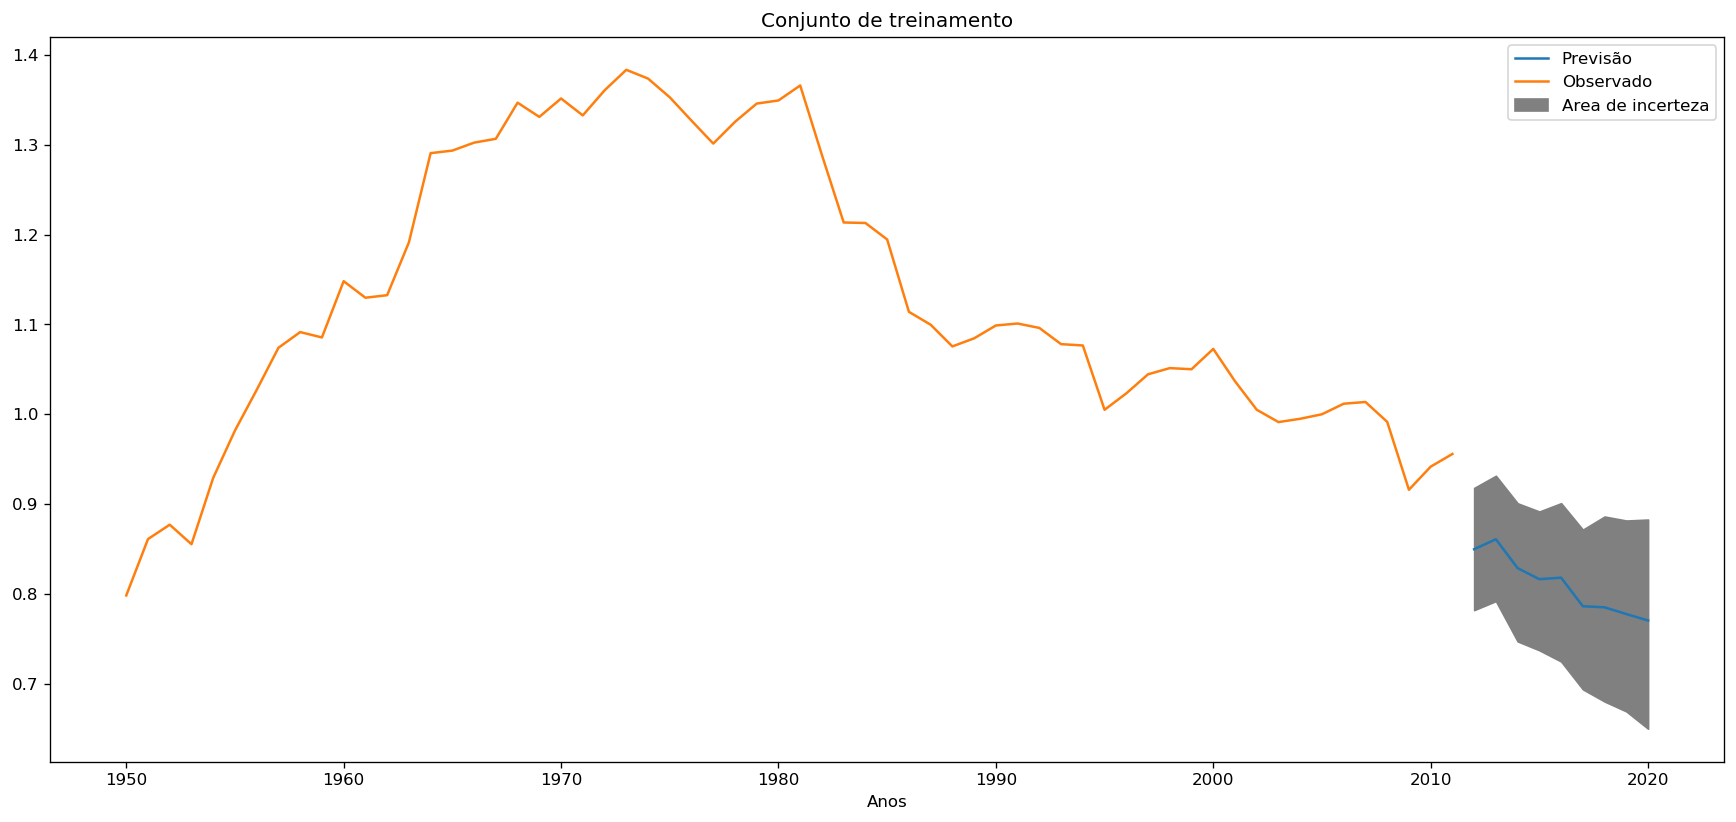

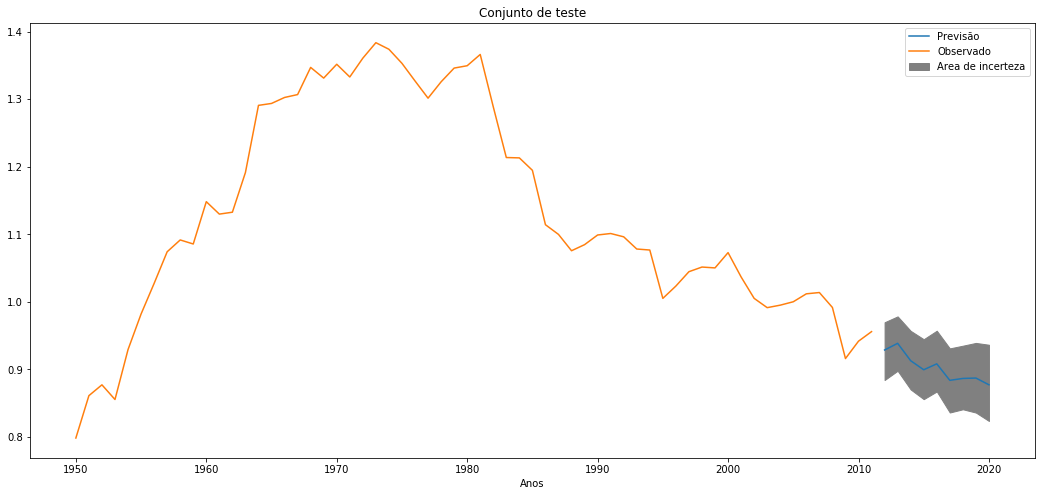

In [27]:
y = pd.DataFrame({'ds':np.array(ds)[:-19], 'y':mex.iloc[:-10,0].values}, index=pd.to_datetime(np.array(ds)[:-19]))
y_test = pd.DataFrame({'ds':ds[:-9],'y':mex.values[:,0]}, index=pd.to_datetime(ds[:-9]).year)

from fbprophet import Prophet

m = Prophet(weekly_seasonality=True,daily_seasonality=True)
m.fit(y)

future=pd.DataFrame({'ds':ds[-9:]})
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forecast.index=pd.to_datetime(forecast.ds.values).year

simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.xlabel('Anos')
plt.title('Conjunto de treinamento')

plt.legend()
plt.show()

from fbprophet import Prophet

m = Prophet(weekly_seasonality=True,daily_seasonality=True)
m.fit(y_test)

future=pd.DataFrame({'ds':ds[-9:]})
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forecast.index=pd.to_datetime(forecast.ds.values).year

simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.xlabel('Anos')
plt.title('Conjunto de teste')
plt.legend()
plt.show()


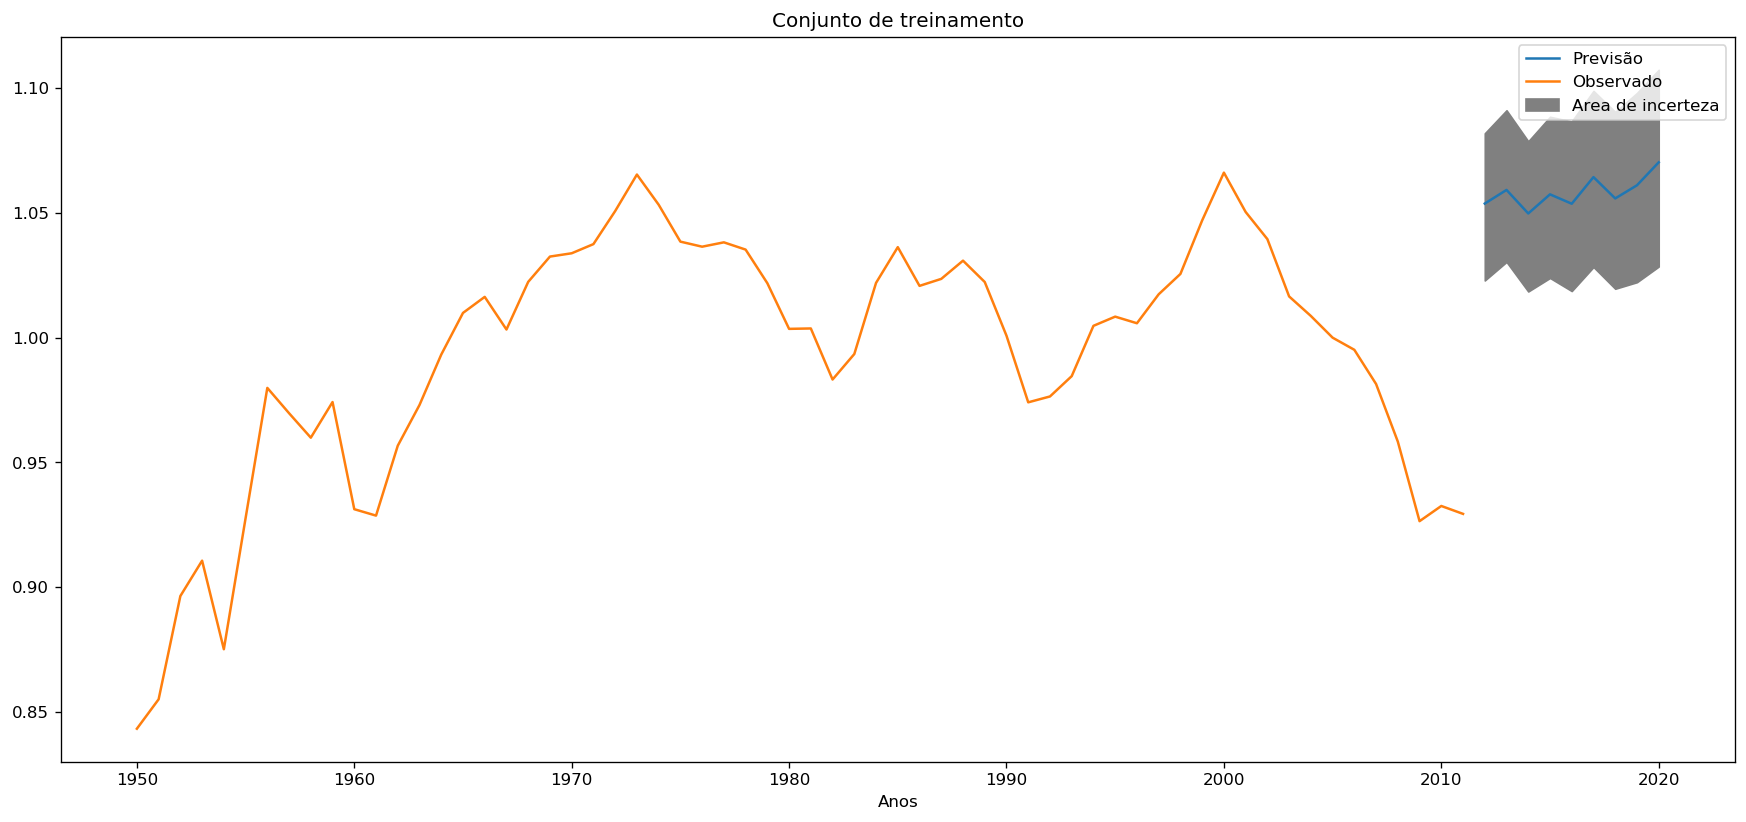

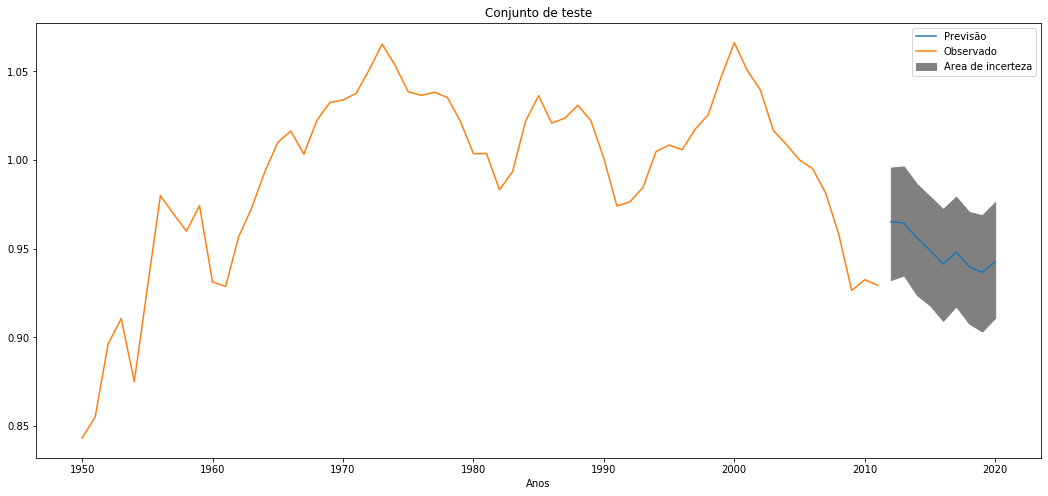

In [29]:
y = pd.DataFrame({'ds':np.array(ds)[:-19], 'y':can.iloc[:-10,0].values}, index=pd.to_datetime(np.array(ds)[:-19]))
y_test = pd.DataFrame({'ds':ds[:-9],'y':can.values[:,0]}, index=pd.to_datetime(ds[:-9]).year)

from fbprophet import Prophet

m = Prophet(weekly_seasonality=True,daily_seasonality=True)
m.fit(y)

future=pd.DataFrame({'ds':ds[-9:]})
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forecast.index=pd.to_datetime(forecast.ds.values).year

simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.xlabel('Anos')
plt.title('Conjunto de treinamento')

plt.legend()
plt.show()

from fbprophet import Prophet

m = Prophet(weekly_seasonality=True,daily_seasonality=True)
m.fit(y_test)

future=pd.DataFrame({'ds':ds[-9:]})
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forecast.index=pd.to_datetime(forecast.ds.values).year

simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.xlabel('Anos')
plt.title('Conjunto de teste')
plt.legend()
plt.show()
